## PHYS-253 

## Homework 2

Handed out: Friday, March 21, 2025

**Due: 4.59 pm; Monday, March 31, 2025**

<div style="border: 1px solid lightgray; padding: 10px; background-color: #f9f9f9;">

<font size=1>

    Georgios Neofotistos, 2025. All rights reserved.

This work is the intellectual property of `Georgios Neofotistos`. All content produced in this notebook is original creation of the author unless specified otherwise. Unauthorized use, reproduction, or distribution of this material, in whole or in part, without explicit permission from the author, is strictly prohibited.
</font>
</div>

## Instructions

a) You are allowed to discuss with your fellow students HOW to solve the problems. Collaboration is encouraged! But you need to hand in your INDIVIDUAL SOLUTION.  

d) List AI assistants (e.g., ChatGPT) that you worked with in arriving at a solution, or other software/tool; see detailed instructions in next cell. 

c) You can use code from previous lectures/labs - you don't neeed to reference this, it is part of the knowledge you acquired in this course.  However, if you use code from other sources, you MUST include a reference to the source.

d) Submit your Notebook (with solutions/answers) to Phys-253 site (area: ΕΡΓΑΣΙΕΣ / HW2).

### On the use of AI assistants (e.g., ChatGPT, or other Generative A.I. tools)

ChatGPT can be used as an on-line “office hours” resource to help with your learning. 
You can use ChatGPT-generated code (e.g. as inspiration if you are stuck or other reasons), however, submission of ChatGPT-generated
code without explanation or acknowledgment will earn you 0 credit. See cell below.

---

***NOTE: if it takes too much time to train your networks, try running them for a few epochs, but make sure that they run well (that is, without errors in setting up the model, compiling, and running it).***

__________________________________________________________________________________________________________________________

### Problem 1 (pretraining problem)


a. Build a dense neural net (DNN) with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.

b. Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4 [*this will be useful for the next problem as you will use transfer learning for digits 5 to 0 in that problem*]. You will need a softmax output layer with five neurons.

c. Try adding Batch Normalization and compare the learning curves. Is it converging faster than before? Does it produce a better model?

d. Try adding dropout to every layer and try again. Does it produce a better model?

# Ερώτημα a) & b)

In [122]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D
from tensorflow.keras.layers import Input , Flatten, Dropout, MaxPooling2D
from keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import cv2

In [2]:
model = keras.models.Sequential()

model.add(Input(shape=(28,28))) #input
model.add(Flatten())
for _ in range(5):
    model.add(Dense(100, activation='elu',kernel_initializer='he_normal'))  #hidden
model.add(Dense(5, activation='softmax'))  #output
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,405 (466.43 KB)

 Trainable params: 119,405 (466.43 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()
X_train =  X_train.astype('float')/255.
X_test =  X_test.astype('float')/255.  #normalization
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
train_mask = y_train<5
test_mask = y_test<5
X_train,y_train = X_train[train_mask], y_train[train_mask]
X_test,y_test = X_test[test_mask],y_test[test_mask]

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=50,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9267 - loss: 0.2134 - val_accuracy: 0.9846 - val_loss: 0.0504
Epoch 2/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9831 - loss: 0.0533 - val_accuracy: 0.9864 - val_loss: 0.0474
Epoch 3/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9880 - loss: 0.0406 - val_accuracy: 0.9846 - val_loss: 0.0534
Epoch 4/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9893 - loss: 0.0305 - val_accuracy: 0.9858 - val_loss: 0.0475
Epoch 5/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9911 - loss: 0.0277 - val_accuracy: 0.9874 - val_loss: 0.0442
Epoch 6/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 0.9881 - val_loss: 0.0437
Epoch 7/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9936 - loss: 0.0182 - val_accuracy: 0.9886 - val_loss: 0.0402
Epoch 8/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9965 - loss: 0.0112 - val_accuracy:

# Ερώτημα c)

In [10]:
model_bn = keras.models.Sequential()

model_bn.add(Input(shape=(28,28))) #input
model_bn.add(Flatten())
for _ in range(5):
    model_bn.add(BatchNormalization())
    model_bn.add(Dense(100, activation='elu',kernel_initializer='he_normal'))  #hidden
model_bn.add(Dense(5, activation='softmax'))  #output
model_bn.summary()

model_bn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_bn = model_bn.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,141 (484.93 KB)

 Trainable params: 121,773 (475.68 KB)

 Non-trainable params: 2,368 (9.25 KB)

Epoch 1/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9238 - loss: 0.2233 - val_accuracy: 0.9815 - val_loss: 0.0622
Epoch 2/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9793 - loss: 0.0659 - val_accuracy: 0.9827 - val_loss: 0.0591
Epoch 3/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9832 - loss: 0.0507 - val_accuracy: 0.9855 - val_loss: 0.0577
Epoch 4/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9862 - loss: 0.0415 - val_accuracy: 0.9851 - val_loss: 0.0566
Epoch 5/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9880 - loss: 0.0372 - val_accuracy: 0.9864 - val_loss: 0.0482
Epoch 6/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9920 - loss: 0.0236 - val_accuracy: 0.9879 - val_loss: 0.0528
Epoch 7/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9905 - loss: 0.0264 - val_accuracy: 0.9877 - val_loss: 0.0496
Epoch 8/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9933 - loss: 0.0228 - val_ac

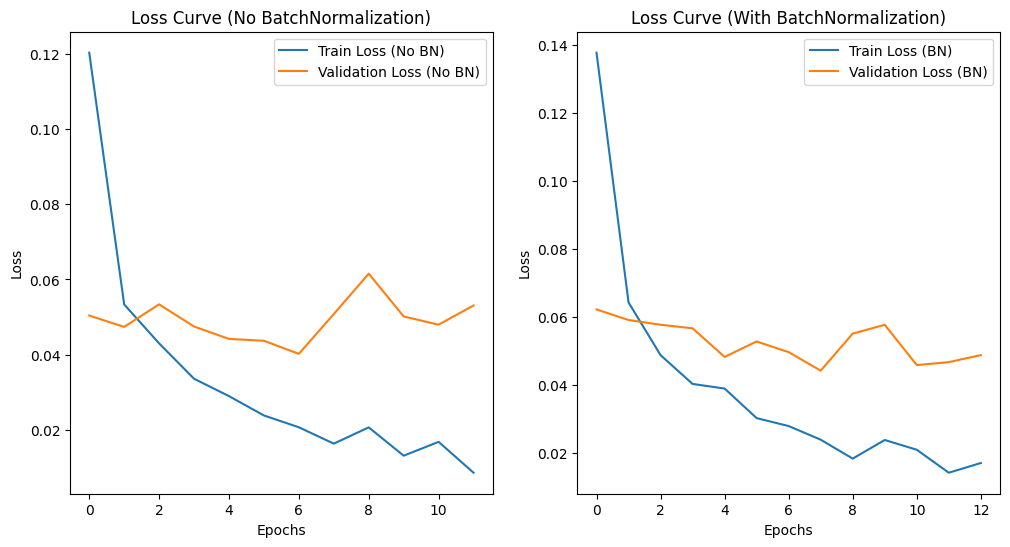

In [19]:
plt.figure(figsize=(12, 6))

#without BatchNormalization 
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (No BN)')
plt.plot(history.history['val_loss'], label='Validation Loss (No BN)')
plt.title('Loss Curve (No BatchNormalization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#with BatchNormalization 
plt.subplot(1, 2, 2)
plt.plot(history_bn.history['loss'], label='Train Loss (BN)')
plt.plot(history_bn.history['val_loss'], label='Validation Loss (BN)')
plt.title('Loss Curve (With BatchNormalization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Η προσθήκη Batch Normalization φάνηκε να οδηγεί σε πιο σταθερή και πιθανώς ταχύτερη σύγκλιση, υποδεικνύοντας ένα πιθανώς καλύτερο μοντέλο.**

# Ερώτημα d)

Epoch 1/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5350 - loss: 1.5866 - val_accuracy: 0.9647 - val_loss: 0.1887
Epoch 2/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9170 - loss: 0.2971 - val_accuracy: 0.9739 - val_loss: 0.1288
Epoch 3/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9431 - loss: 0.2055 - val_accuracy: 0.9745 - val_loss: 0.1190
Epoch 4/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9564 - loss: 0.1700 - val_accuracy: 0.9773 - val_loss: 0.1059
Epoch 5/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9632 - loss: 0.1387 - val_accuracy: 0.9773 - val_loss: 0.1116
Epoch 6/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9635 - loss: 0.1401 - val_accuracy: 0.9794 - val_loss: 0.0840
Epoch 7/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9683 - loss: 0.1214 - val_accuracy: 0.9796 - val_loss: 0.0965
Epoch 8/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9730 - loss: 0.1106 - val_accura

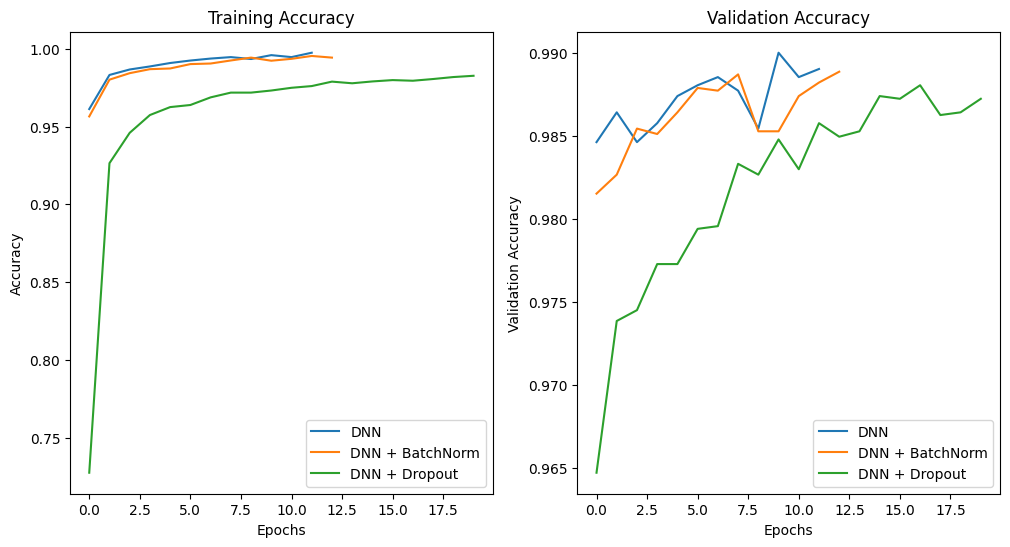

In [18]:
model_dropout = Sequential([
    Input(shape=(28, 28)),  
    Flatten()
])
for _ in range(5):
    model_dropout.add(Dense(100, kernel_initializer='he_normal'))
    model_dropout.add(Dropout(0.5))  # Dropout 50%
    model_dropout.add(keras.layers.ELU())

model_dropout.add(Dense(5, activation='softmax'))  

model_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='DNN')
plt.plot(history_bn.history['accuracy'], label='DNN + BatchNorm')
plt.plot(history_dropout.history['accuracy'], label='DNN + Dropout')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='DNN')
plt.plot(history_bn.history['val_accuracy'], label='DNN + BatchNorm')
plt.plot(history_dropout.history['val_accuracy'], label='DNN + Dropout')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

__________________________________________________________________________________________________________________________

**Παρατηρώ ότι με το dropout έχω αρκετά πιο σταθερό μοντέλο.**

### Problem 2 (transfer learning problem)

a. Create a new DNN that reuses all the pretrained hidden layers of the previous model (problem 1 of HW2), freezes them (try freezing all the reused layers for a few epochs, according to the "pretrained layers" example covered in Lecture 5 - this material is presented in pages 373-376 of A. Geron's book ["Reusing Pretrained Layers" and "Transfer Learning with Keras" sections]), and replaces the softmax output layer with a new one. 

b. Train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision? 


c. Try reusing just four hidden layers instead of five. Can you achieve a higher precision?

d. Now unfreeze the top two hidden layers and continue training. Can you get the model to perform even better?

# Ερώτημα a)

In [98]:
pretrained_model=keras.models.Sequential([
    Input(shape=(28,28)),  
    Flatten()
])

for layer in model.layers[1:-1]:  
    pretrained_model.add(layer)

#freeze
for layer in pretrained_model.layers:
    layer.trainable=False
    
#replace
pretrained_model.add(Dense(10,activation='softmax')) 

pretrained_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
pretrained_model.summary()

early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_20 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,646 (486.90 KB)

 Trainable params: 1,010 (3.95 KB)

 Non-trainable params: 123,636 (482.95 KB)

# Ερώτημα b)

In [99]:
train_mask2 = (y_train >= 5)
test_mask2 = (y_test >= 5)

X_train2, y_train2 = X_train[train_mask2], y_train[train_mask2]
X_test2, y_test2 = X_test[test_mask2], y_test[test_mask2]

history_pretrained = pretrained_model.fit(X_train2, y_train2, epochs=50, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3931 - loss: 31.0997 - val_accuracy: 0.6132 - val_loss: 7.4609
Epoch 2/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6162 - loss: 7.0160 - val_accuracy: 0.6501 - val_loss: 4.9237
Epoch 3/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6472 - loss: 4.6152 - val_accuracy: 0.6800 - val_loss: 3.3593
Epoch 4/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6665 - loss: 3.2911 - val_accuracy: 0.5814 - val_loss: 4.7164
Epoch 5/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6767 - loss: 2.7157 - val_accuracy: 0.6972 - val_loss: 2.0239
Epoch 6/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6861 - loss: 2.1074 - val_accuracy: 0.6427 - val_loss: 2.2120
Epoch 7/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6915 - loss: 1.8267 - val_accuracy: 0.7087 - val_loss: 1.4258
Epoch 8/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7019 - loss: 1.4847 - val_accuracy: 0

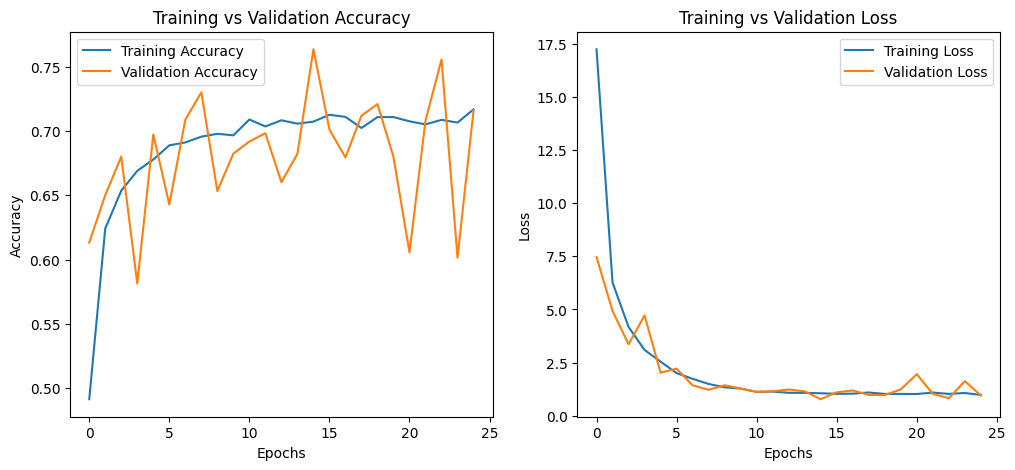

In [100]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_pretrained.history['accuracy'], label='Training Accuracy')
plt.plot(history_pretrained.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_pretrained.history['loss'], label='Training Loss')
plt.plot(history_pretrained.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [115]:
test_loss, test_accuracy = pretrained_model.evaluate(X_test2, y_test2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8325 - loss: 0.6603
Test Accuracy: 85.41%


# Ερώτημα c)

In [101]:
pretrained_model2=keras.models.Sequential([
    Input(shape=(28,28)),  
    Flatten()
])

for layer in model.layers[1:-2]:  
    pretrained_model2.add(layer)

#freeze
for layer in pretrained_model2.layers:
    layer.trainable = False

pretrained_model2.add(Dense(10, activation='softmax'))

pretrained_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_pretrained2 = pretrained_model2.fit(X_train2, y_train2, epochs=50, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3358 - loss: 50.8355 - val_accuracy: 0.6492 - val_loss: 6.6887
Epoch 2/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6640 - loss: 5.7956 - val_accuracy: 0.7130 - val_loss: 3.3247
Epoch 3/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6993 - loss: 3.2447 - val_accuracy: 0.7225 - val_loss: 2.2813
Epoch 4/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7052 - loss: 2.3561 - val_accuracy: 0.7371 - val_loss: 1.6827
Epoch 5/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7139 - loss: 1.7130 - val_accuracy: 0.7286 - val_loss: 1.5164
Epoch 6/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7209 - loss: 1.4397 - val_accuracy: 0.7415 - val_loss: 1.1712
Epoch 7/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7254 - loss: 1.2324 - val_accuracy: 0.7795 - val_loss: 0.8823
Epoch 8/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7319 - loss: 1.0516 - val_accuracy: 0

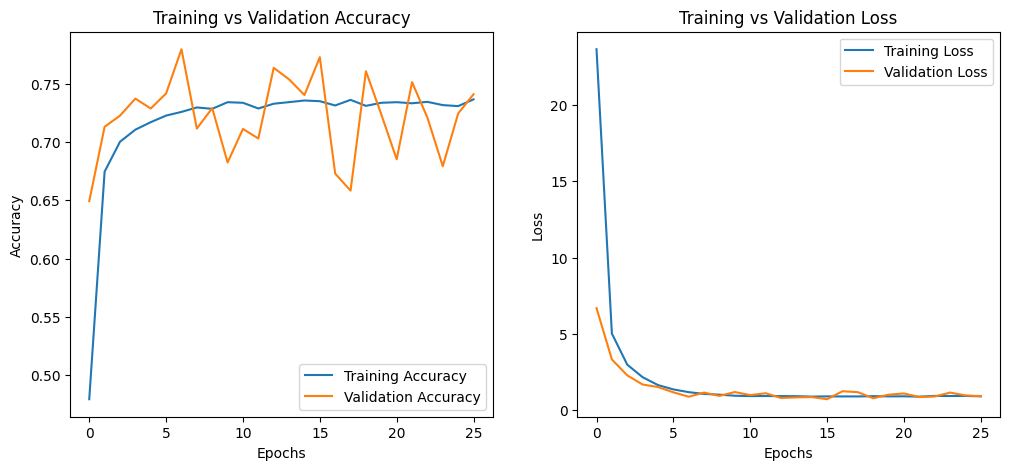

In [102]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_pretrained2.history['accuracy'], label='Training Accuracy')
plt.plot(history_pretrained2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_pretrained2.history['loss'], label='Training Loss')
plt.plot(history_pretrained2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [114]:
test_loss, test_accuracy = pretrained_model2.evaluate(X_test2, y_test2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7475 - loss: 0.8061
Test Accuracy: 77.17%


**Παρατηρώ ότι η ακρίβεια του test set μειώθηκε όταν χρησιμοποιήσαμε μόνο 4 hidden layers.**

# Ερώτημα d)

In [116]:
for layer in pretrained_model2.layers[-2:]:  
    layer.trainable = True

pretrained_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_pretrained3 = pretrained_model2.fit(X_train2, y_train2, epochs=50, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5414 - loss: 1.3685 - val_accuracy: 0.7795 - val_loss: 0.6509
Epoch 2/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7549 - loss: 0.6998 - val_accuracy: 0.7924 - val_loss: 0.6047
Epoch 3/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7669 - loss: 0.6633 - val_accuracy: 0.8000 - val_loss: 0.5894
Epoch 4/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7687 - loss: 0.6499 - val_accuracy: 0.8039 - val_loss: 0.5818
Epoch 5/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7701 - loss: 0.6432 - val_accuracy: 0.8056 - val_loss: 0.5773
Epoch 6/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7721 - loss: 0.6394 - val_accuracy: 0.8053 - val_loss: 0.5744
Epoch 7/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7735 - loss: 0.6370 - val_accuracy: 0.8058 - val_loss: 0.5724
Epoch 8/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7737 - loss: 0.6354 - val_accuracy: 0.

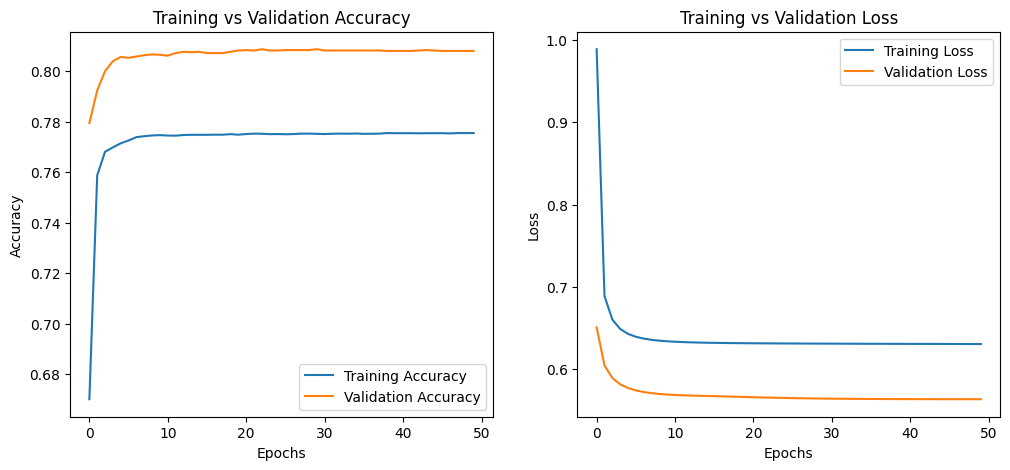

In [117]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_pretrained3.history['accuracy'], label='Training Accuracy')
plt.plot(history_pretrained3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_pretrained3.history['loss'], label='Training Loss')
plt.plot(history_pretrained3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [118]:
test_loss, test_accuracy = pretrained_model2.evaluate(X_test2, y_test2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7677 - loss: 0.6461
Test Accuracy: 79.88%


**Το μοντέλο συμπεριφέρεται καλύτερα απ' ότι στο προηγούμενο ερώτημα πετυχαίνοντας ακρίβεια στο test set 79.88% σε αντίθεση με προηγουμένως που ήταν γύρω στο 77%. Όμως το μοντέλο του α) ερωτήματος είχε καλύτερη απόδοση (~85%) στο test set.**

__________________________________________________________________________________________________________________________

### Problem 3

- Part a) What are the advantages of a CNN over a fully connected DNN for image classification?

- Part b) Make a sketch (by hand, on a piece of paper) to show (explain) your answer(s) to Part a)

**part a)**


1)Οι CNN χρησιμοποιούν φίλτρα που κάνουν slide πάνω στην εικόνα, άρα χρησιμοποιούν λιγότερες παραμέτρους (λιγότεροι υπολογισμοί) από DNN, που συνδέει κάθε pixel με κάθε νευρώνα. Οπότε το training είναι πιο γρήγορο και πιο εύκολο.

2)Αντί να χρειάζεται να μάθει ξεχωριστά κάθε θέση ενός μοτίβου, το CNN αναγνωρίζει τα ίδια μοτίβα όπου κι αν βρίσκονται στην εικόνα.

3)Καλύτερη κατανόηση εικόνας: Τα CNNs πρώτα μαθαίνουν απλά σχήματα (όπως γραμμές), μετά πιο πολύπλοκα μοτίβα (όπως γωνίες) και στο τέλος ολόκληρα αντικείμενα (π.χ. πρόσωπα, ζώα).

4)Επειδή δεν έχουν τόσες πολλές παραμέτρους, τα CNNs δεν αποστηθίζουν εύκολα τα δεδομένα, αλλά γενικεύουν καλύτερα σε νέες εικόνες (preventing overfitting).

**part b)**

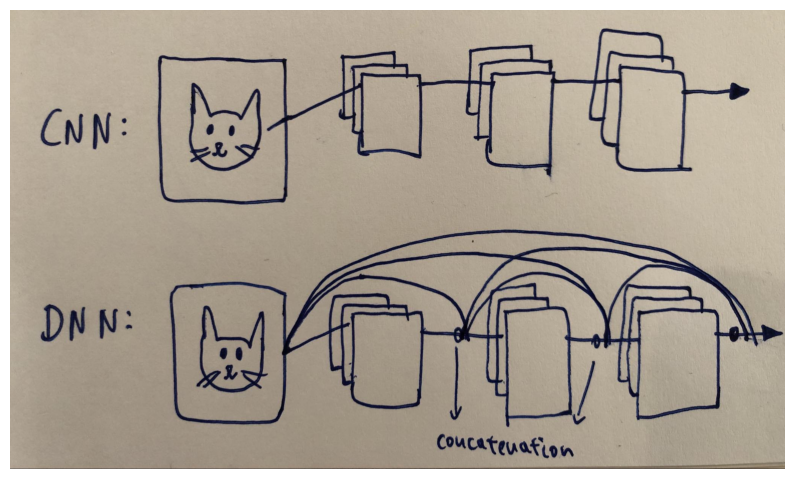

In [123]:
img1 = cv2.imread('C:/Users/micha/Downloads/hw2.jpg')  
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  
plt.figure(figsize=(10,8))  
plt.imshow(img1)
plt.axis("off")   
plt.show()

____________________________________________________________________________________________________________________________

### Problem 4:



In Lecture 6, we discussed a CNN (on MNIST) that uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. [Do not forget to flatten the output of the MaxPool2D layer before stacking the dense layers]. 

Try to beat the level of accuracy (on the test set, the validation set, the train set) achieved in Lecture 6 CNN by adding (or removing) layers, and changing the parameters.

***NOTE: if it takes too much time to train your CNNs, try running just one of them (for few epochs), but present the "candidate" CNNs you plan to train (without actually train them).***

In [120]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.  
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu", input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(128, kernel_size=3, padding="same", activation="relu"),  #one more Conv2D layer
    keras.layers.MaxPool2D(),
    keras.layers.BatchNormalization(),  #added batch normalization
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

#different learning rate
optimizer = keras.optimizers.Nadam(learning_rate=0.0005)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

valid_loss, valid_accuracy = model.evaluate(X_valid, y_valid)
print(f"Validation Accuracy: {valid_accuracy * 100:.2f}%")

train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 569s 327ms/step - accuracy: 0.9211 - loss: 0.2650 - val_accuracy: 0.9866 - val_loss: 0.0520
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 497s 289ms/step - accuracy: 0.9810 - loss: 0.0654 - val_accuracy: 0.9912 - val_loss: 0.0316
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 426s 248ms/step - accuracy: 0.9851 - loss: 0.0471 - val_accuracy: 0.9878 - val_loss: 0.0387
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 456s 265ms/step - accuracy: 0.9892 - loss: 0.0350 - val_accuracy: 0.9916 - val_loss: 0.0310
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 404s 235ms/step - accuracy: 0.9910 - loss: 0.0278 - val_accuracy: 0.9926 - val_loss: 0.0309
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 421s 245ms/step - accuracy: 0.9932 - loss: 0.0203 - val_accuracy: 0.9924 - val_loss: 0.0261
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 442s 257ms/step - accuracy: 0.9936 - loss: 0.0189 - val_accuracy: 0.9920 - val_loss: 0.0315
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 470s 272ms/step - ac

__________________________________________________________________________________________________________________________

οι συνομιλίες μου με το ChatGPT για την κατανόηση των προβλημάτων και την βοήθεια στην εκπόνηση τους.

https://chatgpt.com/share/67eaa4ac-fec0-8013-973f-85d107132b5c

https://chatgpt.com/share/67eaa4dd-c33c-8013-b177-13f1e21601bc